In [1]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



1 package can be upgraded. Run 'apt list --upgradable' to see it.



ffmpeg is already the newest version (7:4.1.6-1~deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [2]:
import cv2
import matplotlib.pyplot as plt
#%matplolib inline

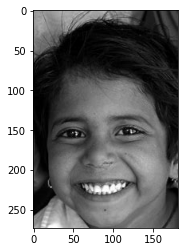

In [3]:
img = cv2.imread("/work/no_mask.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray");

In [4]:
face_mask = cv2.CascadeClassifier("/work/haarcascade_frontalface_default.xml")
mouth = cv2.CascadeClassifier("/work/haarcascade_mouth.xml")

In [5]:
face = face_mask.detectMultiScale(img_gray, 1.1, 4)
if len(face) == 0:
        cv2.putText(img, "No face detected", (55, 280), cv2.FONT_ITALIC, 0.5, (255,0,0), 2)
else:
        for (x, y, w, h) in face:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
            roi_gray = img_gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]    

In [6]:
mouth_detect = mouth.detectMultiScale(img_gray, 1.5, 5)
if(len(mouth_detect) == 0):
    cv2.putText(img, "Thanks for wearing MASK", (10, 20), cv2.FONT_ITALIC, 0.4, (0,255,0), 2)
else:
    for (mx, my, mw, mh) in mouth_detect:
        if(y < my < y + h):
            cv2.putText(img, "Wear MASK to stay safe", (10, 20), cv2.FONT_ITALIC, 0.4, (255,0,0), 2)
            break

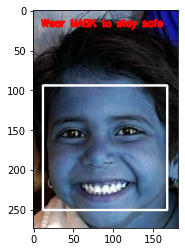

In [7]:
plt.imshow(img);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0488cd44-ac37-4eb4-a526-d18cf3c1d9ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>